In [1]:
import numpy as np
import operator

# A simple KNN example

In [5]:
# create dataset
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ["A", "A", "B", "B"]
    return group, labels

In [3]:
group, labels = createDataSet()

In [4]:
group, labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

In [43]:
# knn algorithm
def KNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # np.tile(A, reps) Construct an array by repeating A the number of times given by reps.
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    # np.argsort can return ordered indicies, default from smaller to bigger one
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        # dic.get(key, val), if key not in dic, return val. 
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # dic.items() return a dict_items list? like [(key, value), (key, vlaue), ...]
    # sorted return a new list; 
    # operator.itemgetter(index) can return a function to get value at index from object
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [44]:
KNN([0, 0], group, labels, 3)

'B'

# KNN for dating testset

In [19]:
# read datingTestSet
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0: 3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [20]:
datingDataMat, datingLabels = file2matrix('./datingTestSet2.txt')

In [21]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

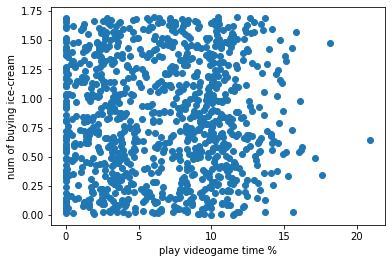

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
ax.set_xlabel('play videogame time %')
ax.set_ylabel('num of buying ice-cream')
plt.show()

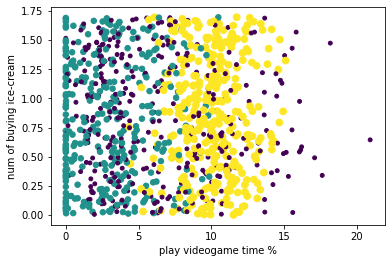

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
'''
ax.scatter(x, y, s=None, c=None)
x,y: data
s: size of point, can be a list, list element is size of point
c: color of point, can be a list, list element  is color of point
'''
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
ax.set_xlabel('play videogame time %')
ax.set_ylabel('num of buying ice-cream')
plt.show()

In [28]:
# feature normalization, here we use max, min normlizaion
def autoNorm(dataSet):
    # np.min(array, axis) axis=0, find every col min, max value
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    # equation is (x - min) / (max - min)
    return normDataSet, ranges, minVals

In [29]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [30]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [31]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [32]:
minVals

array([0.      , 0.      , 0.001156])

In [45]:
# test algorithm
def datingClassTest():
    # hoRatio for split test set
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorcount = 0.0
    for i in range(numTestVecs):
        classifierResult = KNN(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print(f'the classifier came back with: {classifierResult}, the real answer is: {datingLabels[i]}')
        if classifierResult != datingLabels[i]: errorcount += 1
    print(f'The total error rate is {errorcount/float(numTestVecs) * 100}%')

In [36]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

# KNN for MNIST

It is not really MNIST, all pic save as txt. Size is 32 * 32. Content  is 0 and 1.

In [37]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [39]:
testVector = img2vector('testDigits/0_0.txt')

In [40]:
testVector[0, 0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
import os

In [46]:
# use knn recognize MNIST
def handwritingClassTest():
    # save all label
    hwLabels = []
    trainingFileList = os.listdir('trainingDigits')
    m = len(trainingFileList)
    # training set
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('trainingDigits/%s' % fileNameStr)
    
    testFileList = os.listdir('testDigits')
    errorCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector(f'testDigits/{fileNameStr}')
        classifierResult = KNN(vectorUnderTest, trainingMat, hwLabels, 3)
        print(f'the classifier came back with: {classifierResult}, the real answer is {classNumStr}')
        if (classifierResult != classNumStr): errorCount += 1.0
    print(f'\nthe total number of errors is: {errorCount}')
    print(f'\nthe total error rate is: {errorCount / float(mTest)}')

In [47]:
handwritingClassTest()

the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classi